# Proyecto Final Cloud
## Aplicando Machine Learning para predecir las actividades diarias de una persona.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#Leemos la data
persona = pd.read_csv('personaA.csv', sep=";")

#Imprimimos la cabecera
print "Datos:"
print persona.head(40)
#print persona['Actividad'].unique()
#print persona.columns


Datos:
   inicio_fecha inicio_hora final_fecha final_hora      Actividad
0    2011-11-28    02:27:59  2011-11-28   10:18:11       Sleeping
1    2011-11-28    10:21:24  2011-11-28   10:23:36      Toileting
2    2011-11-28    10:25:44  2011-11-28   10:33:00      Showering
3    2011-11-28    10:34:23  2011-11-28   10:43:00      Breakfast
4    2011-11-28    10:49:48  2011-11-28   10:51:13       Grooming
5    2011-11-28    10:51:41  2011-11-28   13:05:07  Spare_Time/TV
6    2011-11-28    13:06:04  2011-11-28   13:06:31      Toileting
7    2011-11-28    13:09:31  2011-11-28   13:29:09        Leaving
8    2011-11-28    13:38:40  2011-11-28   14:21:40  Spare_Time/TV
9    2011-11-28    14:22:38  2011-11-28   14:27:07      Toileting
10   2011-11-28    14:27:11  2011-11-28   15:04:00          Lunch
11   2011-11-28    15:04:59  2011-11-28   15:06:29       Grooming
12   2011-11-28    15:07:01  2011-11-28   20:20:00  Spare_Time/TV
13   2011-11-28    20:20:55  2011-11-28   20:20:59          Snack
14 

In [2]:
import time
from datetime import datetime
from dateutil import parser
from sklearn import preprocessing

#Convertimos una variable categorica a una variable numerica.
encoder_actividad = preprocessing.LabelEncoder()
persona.Actividad = encoder_actividad.fit_transform(persona.Actividad)

#Agregar una nueva columna que sera la variable numerica de 'Activity'
persona['Actividad_numero'] = persona['Actividad']

#Volvemos de la variable numerica a categorica.
persona.Actividad = encoder_actividad.inverse_transform(persona.Actividad)

#Ver data
print persona.head(15)
#print persona['Actividad'].unique()

persona = persona[persona.Actividad != "Spare_Time/TV"]
persona = persona[persona.Actividad != "Grooming"]
persona = persona[persona.Actividad != "Snack"]
persona = persona[persona.Actividad != "Toileting"]
persona = persona[persona.Actividad != "Showering"]
#persona = persona[persona.Actividad != "Leaving"]
#Ver la nueva data
#print persona[['Actividad','Actividad_numero']]


   inicio_fecha inicio_hora final_fecha final_hora      Actividad  \
0    2011-11-28    02:27:59  2011-11-28   10:18:11       Sleeping   
1    2011-11-28    10:21:24  2011-11-28   10:23:36      Toileting   
2    2011-11-28    10:25:44  2011-11-28   10:33:00      Showering   
3    2011-11-28    10:34:23  2011-11-28   10:43:00      Breakfast   
4    2011-11-28    10:49:48  2011-11-28   10:51:13       Grooming   
5    2011-11-28    10:51:41  2011-11-28   13:05:07  Spare_Time/TV   
6    2011-11-28    13:06:04  2011-11-28   13:06:31      Toileting   
7    2011-11-28    13:09:31  2011-11-28   13:29:09        Leaving   
8    2011-11-28    13:38:40  2011-11-28   14:21:40  Spare_Time/TV   
9    2011-11-28    14:22:38  2011-11-28   14:27:07      Toileting   
10   2011-11-28    14:27:11  2011-11-28   15:04:00          Lunch   
11   2011-11-28    15:04:59  2011-11-28   15:06:29       Grooming   
12   2011-11-28    15:07:01  2011-11-28   20:20:00  Spare_Time/TV   
13   2011-11-28    20:20:55  2011-

In [3]:
def datetime_to_int(dt_list):
    ftr = [3600,60,1]
    return [sum([a*b for a,b in zip(ftr, map(int,x.split(':')))]) for x in dt_list]

inicio_hora = datetime_to_int(persona['inicio_hora'])
final_hora = datetime_to_int(persona['final_hora'])

#print inicio_hora
persona['inicio_hora_n'] = inicio_hora
persona['final_hora_n'] = final_hora

#Extraemos las columnas importantes para crear el modelo

persona[['inicio_hora','final_hora', 'Actividad','Actividad_numero']].head(40)
#print persona.head(3)

,inicio_hora,final_hora,Actividad,Actividad_numero
0,02:27:59,10:18:11,Sleeping,5
3,10:34:23,10:43:00,Breakfast,0
7,13:09:31,13:29:09,Leaving,2
10,14:27:11,15:04:00,Lunch,3
15,02:16:00,11:31:00,Sleeping,5
19,12:08:28,12:18:00,Breakfast,0
25,15:14:33,15:45:54,Lunch,3
32,19:02:15,20:23:38,Leaving,2
34,01:22:33,10:07:31,Sleeping,5
37,10:22:59,10:35:00,Breakfast,0


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


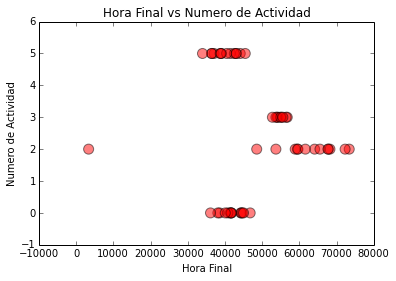

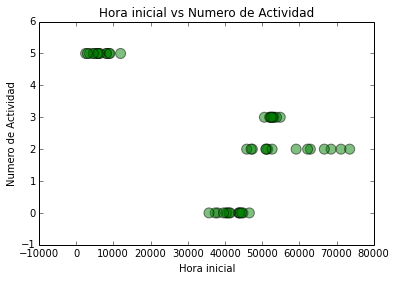

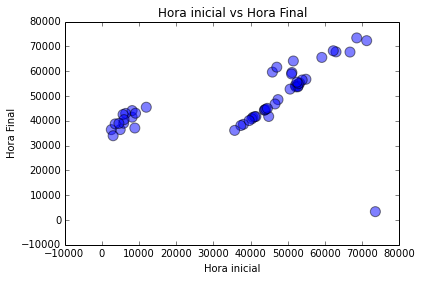

In [4]:
import numpy as np

X = persona[['inicio_hora_n','final_hora_n']]


#Ploteo
N = 50
colors = np.random.rand(N)
area = np.pi * (8 * 2**2 )
plt.scatter(persona['final_hora_n'], persona['Actividad_numero'], s=area, c=["red"], alpha=0.5)
plt.xlabel('Hora Final')
plt.ylabel('Numero de Actividad')
plt.title('Hora Final vs Numero de Actividad')
plt.show()

plt.scatter(persona['inicio_hora_n'], persona['Actividad_numero'], s=area, c=["green"], alpha=0.5)
plt.xlabel('Hora inicial')
plt.ylabel('Numero de Actividad')
plt.title('Hora inicial vs Numero de Actividad')
plt.show()


plt.scatter(persona['inicio_hora_n'], persona['final_hora_n'], s=area, c=["blue"], alpha=0.5)
plt.xlabel('Hora inicial')
plt.ylabel('Hora Final')
plt.title('Hora inicial vs Hora Final')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

# import some data to play with
#iris = datasets.load_iris()

X = persona[['inicio_hora_n','final_hora_n']]
Y = persona['Actividad_numero']

#Partimos la data, una conjunto para el training y otro para el testing(33%)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33)



In [6]:
#Creamos el modelo
model = linear_model.LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')

#Ajustar el modelo segun los datos de entrenamiento.
model.fit(X_train, Y_train)

print "Score: ", model.score(X_test,Y_test)

#Predecimos los valores con datos entrenados
predictions = model.predict(X_test)

indices = Y_test.index.values
#print persona[['inicio_hora', 'final_hora', 'Actividad', 'Actividad_numero']].loc[indices]

resultados = persona[['inicio_hora', 'final_hora', 'Actividad']].loc[indices]
resultados["Prediccion"] = predictions

#Volvemos de la variable numerica a categorica.
resultados.Prediccion = encoder_actividad.inverse_transform(resultados.Prediccion)



#for i, prediction in enumerate(predictions):   
    #print 'Hora_i: %s, Hora_f: %s, Predecido: %s, Real: %d' % (prediction, Y_test.iloc[i])
    #print 'Predecido: %s, Real: %d' % (prediction, Y_test.iloc[i])
    
resultados = resultados.replace(['Breakfast', 'Lunch', 'Leaving', 'Sleeping'], 
                   ['Desayuno', 'Almuerzo', 'Salida', 'Durmiendo'])

print "\n>>>Resultados\n\n"
resultados



Score:  0.411764705882

>>>Resultados




/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


,inicio_hora,final_hora,Actividad,Prediccion
168,00:59:56,10:45:40,Durmiendo,Durmiendo
10,14:27:11,15:04:00,Almuerzo,Salida
82,14:47:00,15:20:00,Almuerzo,Salida
109,12:56:08,12:59:48,Desayuno,Salida
242,12:21:57,12:30:09,Desayuno,Salida
131,14:38:07,14:55:06,Salida,Salida
229,09:55:18,10:02:10,Desayuno,Salida
105,03:19:17,12:37:49,Durmiendo,Durmiendo
225,00:50:47,09:26:17,Durmiendo,Durmiendo
19,12:08:28,12:18:00,Desayuno,Salida


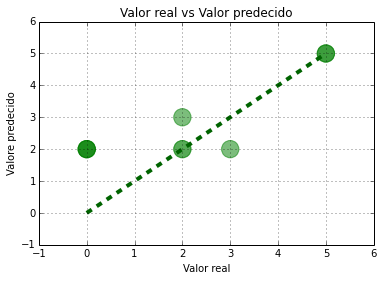

In [7]:
#Ploteando

plt.scatter(Y_test, predictions, alpha=0.3, color='green', s=300)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color='darkgreen',lw=4)
plt.xlabel('Valor real')
plt.ylabel('Valore predecido')
plt.title('Valor real vs Valor predecido')
plt.grid(True)
plt.show()

# Despliegue de la informacion y la prediccion en una aplicacion web.


## Pasos:

### 1. Crear el modelo y enviar los datos medidos( por los sensores) y predecidos (por el modelo) al servidor

Para ese objetivo se envia los siguientes datos:
- Hora inicial.
- Hora final.
- Actividad.
- Y la Actividad predicha.

## 2. Graficar en el servidor los resultados

En el servidor, ubicado en una instancia en amazon, se recibira los datos para luego graficar los datos reales y las predicciones en tiempo real.







In [8]:
import urllib2
import urllib
import random
import time

def enviar(inicio_h, final_h, actividad, predecido):

    data = {}
    data["inicio_h"] = str(inicio_h)
    data["final_h"] = str(final_h)
    data["actividad"] = str(actividad)
    data["predecido"] = str(predecido)

    parametros = urllib.urlencode(data)
    url = 'http://openack.com/Projects/cloud/evaluacionA.php'
    full_url = url + '?' + parametros

    data = urllib2.urlopen(full_url)

#for x in range(50):
#    enviar()
#    time.sleep(1)

def main():
    resultados.sort_values(by=['inicio_hora'], ascending=[True], inplace=True)
    
    #print resultados.columns
    
    for index, row in resultados.iterrows():
        print row['inicio_hora'], row['final_hora'], row['Actividad'], row['Prediccion']
        enviar(row['inicio_hora'], row['final_hora'], 
               row['Actividad'], row['Prediccion'])
        time.sleep(0.5)
    
#main()

00:50:47 09:26:17 Durmiendo Durmiendo
00:59:56 10:45:40 Durmiendo Durmiendo
02:16:00 11:31:00 Durmiendo Durmiendo
03:19:17 12:37:49 Durmiendo Durmiendo
09:55:18 10:02:10 Desayuno Salida
10:34:23 10:43:00 Desayuno Salida
11:25:12 11:34:01 Desayuno Salida
12:08:28 12:18:00 Desayuno Salida
12:21:57 12:30:09 Desayuno Salida
12:44:16 16:33:56 Salida Almuerzo
12:56:08 12:59:48 Desayuno Salida
13:04:03 17:07:03 Salida Almuerzo
14:10:03 16:21:41 Salida Salida
14:27:11 15:04:00 Almuerzo Salida
14:38:07 14:55:06 Salida Salida
14:47:00 15:20:00 Almuerzo Salida
17:29:29 18:49:51 Salida Salida
